In [1]:
#import all packages 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#load dataset

In [15]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
#As we can notice Gender is a categorical variable -> convert categorical variable into quantitative numeric variable

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df['Gender']=le.fit_transform(df['Gender'])

In [20]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [21]:
#Now checking for null values 

In [23]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
#now as we can see purchased is a categorical variable so we need to use logistic regression

In [26]:
#Selecting the independent and the dependent variable

In [146]:
x=df[['Gender','Age','EstimatedSalary']]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [147]:
#dependent variable 
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [148]:
#splitting data set into training and testing set

In [149]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [213]:
#Standardizing the independent variables 
#1. using  min max scaler 
#2. using standard scaler

In [214]:
from sklearn.preprocessing import MinMaxScaler

In [215]:
scaler=MinMaxScaler()

In [216]:
x_train=scaler.fit_transform(x_train)

In [217]:
x_test=scaler.fit_transform(x_test)

In [218]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [219]:
#2. using Standard Scaler

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
scaler=StandardScaler()

In [222]:
x_train=scaler.fit_transform(x_train)

In [223]:
x_test=scaler.fit_transform(x_test)

In [224]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [225]:
#create regression model

In [226]:
from sklearn import linear_model

In [227]:
model=linear_model.LogisticRegression()

In [228]:
#train kr diya model ko 
model.fit(x_train,y_train)

LogisticRegression()

In [229]:
#predict krna 
y_pred=model.predict(x_test)

In [230]:
#Confusion Matrix and TP , TN , FP, FN

In [231]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [232]:
cm=confusion_matrix(y_test,y_pred)

In [233]:
TN=cm[0][0]
FN=cm[1][0]
TP=cm[0][1]
FP=cm[1][1]
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")
print(f"True Positive: {TP}")
print(f"False Positive: {FP}")

True Negative: 52
False Negative: 20
True Positive: 3
False Positive: 25


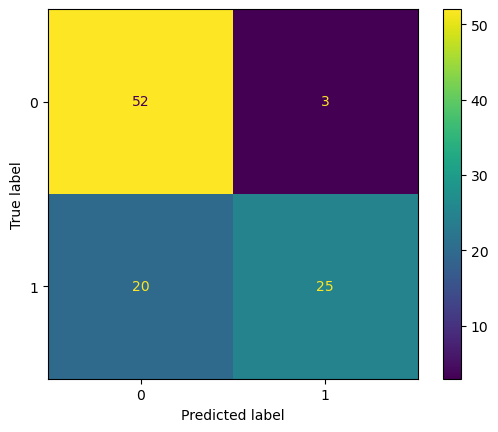

In [234]:
#displaying Confusion Matrix
configdisp=ConfusionMatrixDisplay(cm)
configdisp.plot()

In [235]:
#Parameters related to Confusion Matrix

In [236]:
#1. Accuracy 
#2.  ErrorRate(1-acc)
#3. Precision
#4. Recall

In [237]:
#1. Accuracy

In [238]:
acc=(TP+TN)/(TP+TN+FP+FN)
print(f"Accuracy is: {acc}")

Accuracy is: 0.55


In [239]:
errRate=1-acc
print(f"Error rate is : {errRate}")

Error rate is : 0.44999999999999996


In [240]:
#Precision
Precision=(TP)/(TP+FP)
print(f"Precision : {Precision}")

Precision : 0.10714285714285714


In [241]:
Recall=(TP)/(TP+FN)
print(f"Recall : {Recall}")

Recall : 0.13043478260869565
